In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('student-mat.csv')
df = df[['age','sex','absences','studytime', 'G1','G2','G3']]

In [5]:
df.rename(columns = {'G1':'1st score','G2':'2nd score','G3':'final score','studytime':'weekly study time'}, inplace = True)
df = df.dropna()
df.head()

,age,sex,absences,weekly study time,1st score,2nd score,final score
0,18,F,6,2,5,6,6
1,17,F,4,2,5,5,6
2,15,F,10,2,7,8,10
3,15,F,2,3,15,14,15
4,16,F,4,2,6,10,10


## Univariate Data 
#### OUTCOME VARIABLE
Final Score
#### CATEGORICAL PREDICTOR VARIABLES
Sex
Weekly Studying
#### CONTINUOUS PREDICTOR VARIABLES
Age,
Absences,
First Score,
Second Score

In [6]:
df.describe()

,age,absences,weekly study time,1st score,2nd score,final score
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,2.035443,10.908861,10.713924,10.415190
std,1.276043,8.003096,0.839240,3.319195,3.761505,4.581443
min,15.000000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,1.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,8.000000,2.000000,13.000000,13.000000,14.000000
max,22.000000,75.000000,4.000000,19.000000,19.000000,20.000000


# Age

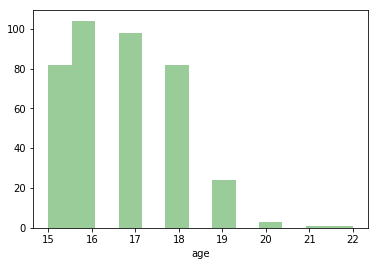

In [7]:
age = sns.distplot( df['age'], label='age', color='green',kde=False)

# Absences

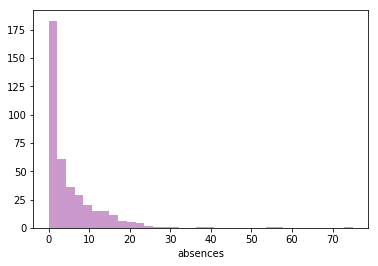

In [8]:
absences = sns.distplot(df['absences'], label = 'absences', color = 'purple', kde = False)

# First Score

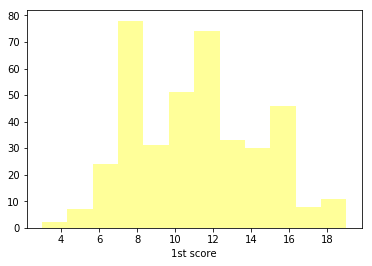

In [9]:
first_score = sns.distplot(df['1st score'], label = 'first score', color = 'yellow', kde=False)

# Second Score

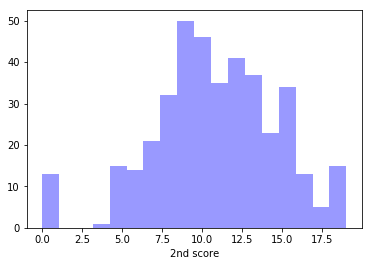

In [10]:
second_score = sns.distplot(df['2nd score'], label = 'second score', color = 'blue', kde=False)

# Final Score

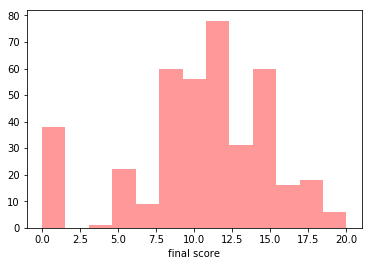

In [11]:
final_score = sns.distplot(df['final score'], label = 'final score', color = 'red', kde=False)

# Sex

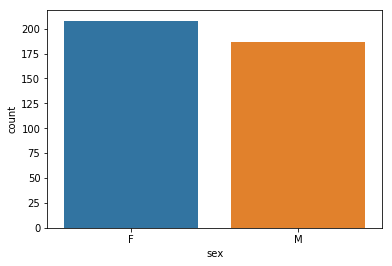

In [21]:
sex = sns.countplot(df['sex'])

# Weekly Studying

### New Feature: 'weekly study time 2'
This recodes the week study time values as string values.

In [13]:
features = pd.DataFrame()

df['weekly study time 2'] = None

df.loc[df['weekly study time'] == 1, 'weekly study time 2'] = '<2 Hours'
df.loc[df['weekly study time'] == 2, 'weekly study time 2'] = '2 to 5 Hours'
df.loc[df['weekly study time'] == 3, 'weekly study time 2'] = '5 to 10 Hours'
df.loc[df['weekly study time'] == 4, 'weekly study time 2'] = '>10 Hours'

features['weekly study time 2']=df['weekly study time 2']

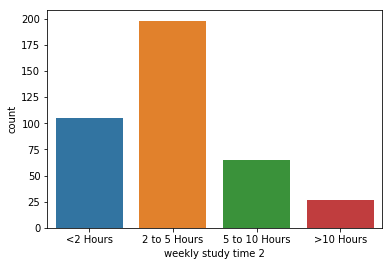

In [14]:
weekly_studying = sns.countplot(df['weekly study time 2'], order =['<2 Hours','2 to 5 Hours','5 to 10 Hours','>10 Hours'])

## Bivariate Data

In [79]:
categorical = df[['sex','weekly study time 2']]

In [80]:
counttable = pd.crosstab(categorical['sex'], categorical['weekly study time 2'])
counttable.head()

weekly study time 2,2 to 5 Hours,5 to 10 Hours,<2 Hours,>10 Hours
sex,,,,
F,113,51,27,17
M,85,14,78,10


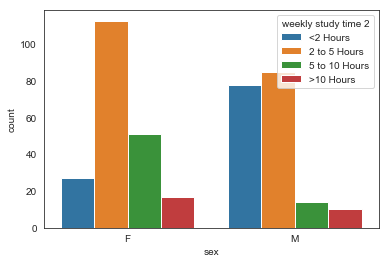

In [82]:
relationships = sns.countplot(x='sex', hue='weekly study time 2', data=categorical,hue_order=['<2 Hours','2 to 5 Hours','5 to 10 Hours','>10 Hours'])

## Continuous Variables

### Age, sex, and weekly study time

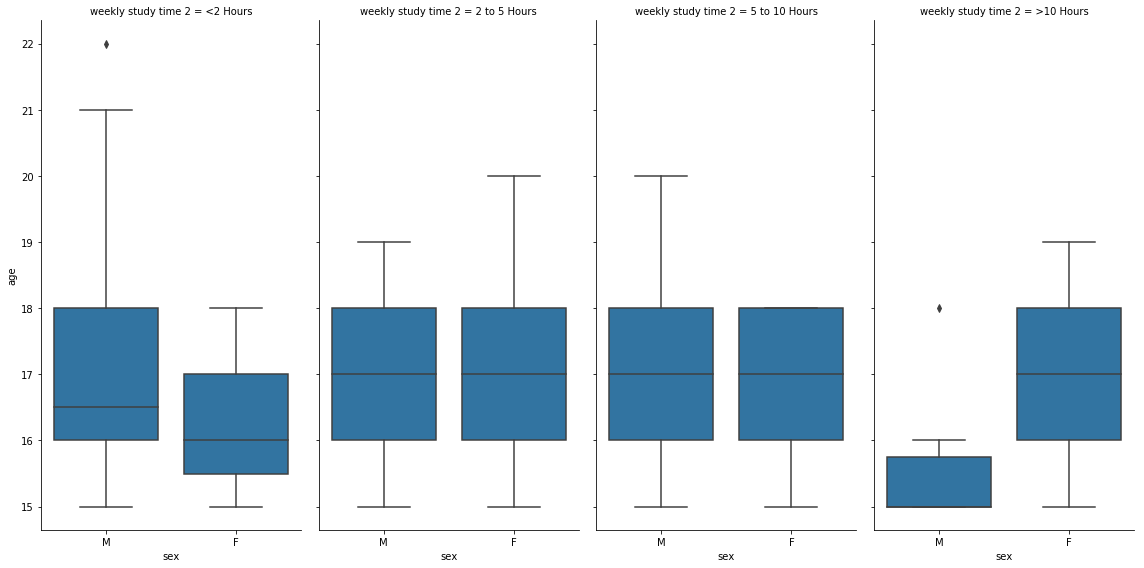

In [19]:
relationships = sns.FacetGrid(df, col='weekly study time 2', col_order = ['<2 Hours','2 to 5 Hours','5 to 10 Hours','>10 Hours'],size=8, aspect=.5)
relationships = relationships.map(sns.boxplot, 'sex', 'age')

### Absences, sex , and weekly study time

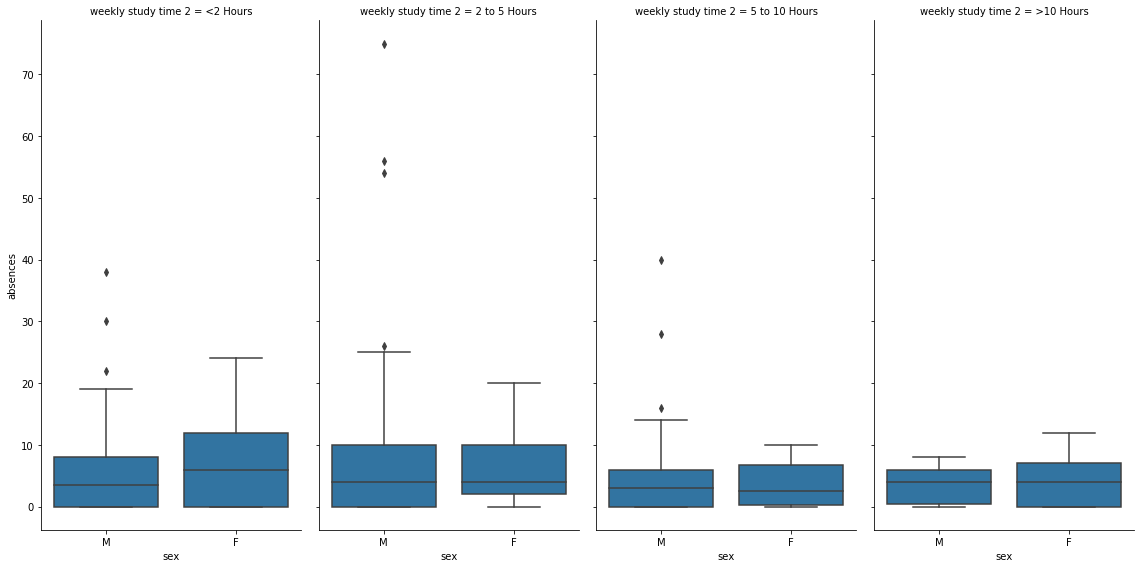

In [20]:
relationships = sns.FacetGrid(df, col='weekly study time 2', col_order = ['<2 Hours','2 to 5 Hours','5 to 10 Hours','>10 Hours'],size=8, aspect=.5)
relationships = relationships.map(sns.boxplot, 'sex', 'absences')

### New Feature: 'score'
This combines the data values from the 1st score and 2nd score columns.

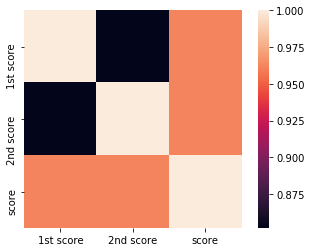

In [25]:
means = df[['1st score','2nd score']].mean(axis=0) 
stds = df[['1st score','2nd score']].std(axis=0)
features['score'] = ((df[['1st score','2nd score']] - means) / stds).mean(axis=1)
correlation_update = df[['1st score','2nd score']]
score = features['score']
correlation_frame = pd.concat([correlation_update,score],axis=1)
correlation_frame = correlation_frame.corr()
heatmap = sns.heatmap(correlation_frame,square=True)

### New Feature: 'absences_interim'
This feature adds 0 values to the absences column. This is used to avoid erros in trying to graph the data.

In [27]:
features['absences_interim']=df['absences']+1

### New Feature: 'absences_transformed'

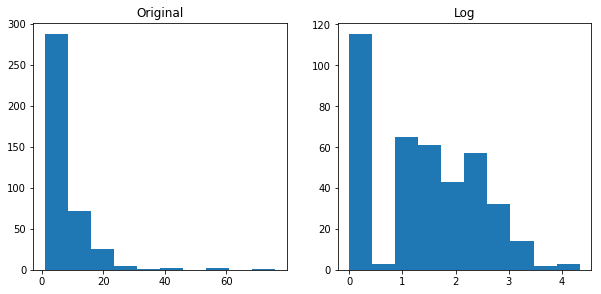

In [29]:
fig = plt.figure(figsize=[10,10])
fig.add_subplot(221)
plt.hist(features['absences_interim'])
plt.title('Original')
fig.add_subplot(222)
plt.hist(np.log(features['absences_interim']))
plt.title('Log')
plt.show()

### New Feature: 'age_transformed'

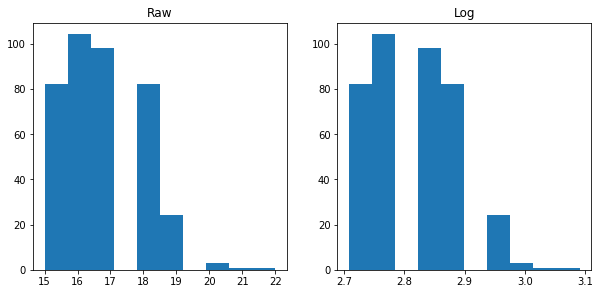

In [30]:
fig = plt.figure(figsize=[10,10])
fig.add_subplot(221)
plt.hist(df['Original'])
plt.title('Raw')
fig.add_subplot(222)
plt.hist(np.log(df['age']))
plt.title('Log')
plt.show()

In [31]:
features['score_interim']=features['score']**2

### New Feature: 'score_transformed'

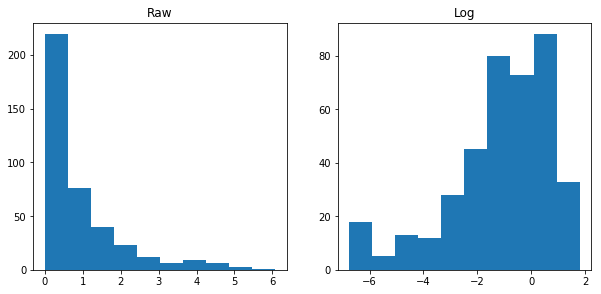

In [32]:
fig = plt.figure(figsize=[10,10])
fig.add_subplot(221)
plt.hist(features['score_interim'])
plt.title('Original')
fig.add_subplot(222)
plt.hist(np.log(features['score_interim']))
plt.title('Log')
plt.show()


### New Feature: 'sex'

In [33]:
features['sex_recoded'] = np.where((df['sex'].isin(['F', 'M'])), 1, 0)
df['sex_recoded'] = features['sex_recoded']

### New Feature: 'weekly study time'
The values were recoded in order to be specific to the number of hours studied.

In [35]:
features['lessthan2hours_recoded'] = features['weekly study time 2'].map({'<2 Hours': 1, '2 to 5 Hours': 0,'5 to 10 Hours': 0,'>10 Hours': 0})

In [38]:
features['2to5hours_recoded'] = features['weekly study time 2'].map({'<2 Hours': 0, '2 to 5 Hours': 1,'5 to 10 Hours': 0,'>10 Hours': 0})

In [39]:
features['5to10hours_recoded'] = features['weekly study time 2'].map({'<2 Hours': 0, '2 to 5 Hours': 0,'5 to 10 Hours': 1,'>10 Hours': 0})

### Features Created:
'weekly study time 2', 'score', 'absences interim', 'absences_transformed', 'age_transformed', 'score_interim', 'score_transformed', 'sex_recoded', 'lessthan2hours_recoded', '2to5hours_recoded', '5to10hours_recoded'